## Overview
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

## Guidelines
You can make 20 submissions per day. Once you submit your results, you will get a roc-auc score computed based on 40% of the test data. This score will position you somewhere on the leaderboard. Once the competition ends, you will see the final accuracy computed based on 100% of the test data.

* Understand the Problem Statement and Import the Packages and Datasets
* Perform EDA (Exploratory Data Analysis) – Understanding the Datasets. Explore Train and Test Data and get to know what each Column / Feature denotes. Check for Imbalance of Target Column in Datasets
* (Check for Duplicate Rows from Train Data
* Fill/Impute Missing Values – Continuous – Mean/Median/Any Specific Value | Categorical – Others/ForwardFill/BackFill
* Feature Engineering – Feature Selection – Selection of Most Important Existing Features | Feature Creation or Binning  – Creation of New Feature(s) from the Existing Feature(s)
* Split Train Data into Features(Independent Variables) | Target(Dependent Variable)
* Data Encoding – Label Encoding, One-Hot Encoding | Data Scaling – MinMaxScaler, StandardScaler, RobustScaler
* Create Baseline Machine Learning Model for the Binary Classification problem
* Ensemble with Voting Classifier to Improve the Evaluation Metric “F1-Score” and Predict Target “churned”
* Result Submission, Check Leaderboard, and Improve “Accuracy-Score”

In [2]:
#import modules 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option('MAX_COLUMNS', None)

# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving SampleSubmission.csv to SampleSubmission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [4]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("SampleSubmission.csv")

In [5]:
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,719051733,0,63,M,0,College,Single,$60K - $80K,Blue,51,4,2,1,2706.0,889,1817.0,0.730,5047,64,0.882,0.329
1,719324658,0,27,M,0,College,Unknown,$80K - $120K,Silver,19,1,1,3,34516.0,1131,33385.0,0.715,14716,112,0.750,0.033
2,799475658,0,51,F,3,Uneducated,Married,Less than $40K,Blue,45,3,3,3,2238.0,1300,938.0,1.071,4508,79,0.756,0.581


In [6]:
df.tail(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8098,794632308,0,40,M,4,Graduate,Married,$60K - $80K,Silver,25,5,3,2,28822.0,2517,26305.0,0.492,1504,35,0.296,0.087
8099,710153583,1,30,F,0,Uneducated,Married,Less than $40K,Blue,13,3,1,3,6075.0,0,6075.0,0.923,9242,63,0.909,0.000
8100,779916408,0,39,F,4,Graduate,Single,Unknown,Blue,23,1,3,2,1811.0,0,1811.0,0.835,4934,70,0.628,0.000


In [7]:
df.shape, test.shape

((8101, 21), (2026, 20))

The train data set has a total of 8101 rows and 21 features. The depenedent variable is Attrition_Flag, with 20 dependent features.


* Attrition_Flag (0) signifies customers who have not churned 
* Attrition_Flag (1) signifies customer who have churned (customers who have left the business)

Since the task requires us to pick a value (churn/no churn), the task qualifies as a classification problem.


In [8]:
pd.DataFrame({'missing':df.isna().sum(),
             'unicos':df.nunique(),
             'typs': df.dtypes})  #With no null values we would investigate the unique values in each column

,missing,unicos,typs
CLIENTNUM,0,8101,int64
Attrition_Flag,0,2,int64
Customer_Age,0,45,int64
Gender,0,2,object
Dependent_count,0,6,int64
Education_Level,0,7,object
Marital_Status,0,4,object
Income_Category,0,6,object
Card_Category,0,4,object
Months_on_book,0,44,int64


In [9]:
df.Card_Category.unique()

array(['Blue', 'Silver', 'Gold', 'Platinum'], dtype=object)

In [10]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]
df_cat

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,College,Single,$60K - $80K,Blue
1,M,College,Unknown,$80K - $120K,Silver
2,F,Uneducated,Married,Less than $40K,Blue
3,F,College,Divorced,Less than $40K,Blue
4,M,Uneducated,Single,$60K - $80K,Blue
...,...,...,...,...,...
8096,M,Graduate,Single,$60K - $80K,Blue
8097,F,Unknown,Single,Less than $40K,Blue
8098,M,Graduate,Married,$60K - $80K,Silver
8099,F,Uneducated,Married,Less than $40K,Blue


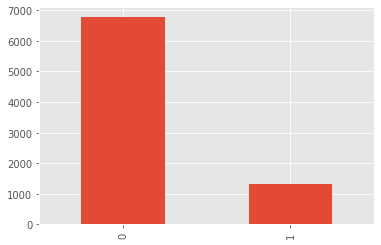

In [ ]:
#The disparity between the churned and not-churned is large therefore we would normalize the feature
df['Attrition_Flag'].value_counts().plot(kind='bar',stacked=True)

In [11]:
#Import Scikit Learn module 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [27]:
#Encoding the object(categorical) variables 
# Convert the Country column to a one hot encoded Data Frame
df = pd.get_dummies(df, columns=['Gender','Education_Level','Marital_Status','Income_Category','Card_Category'], prefix='OH')


In [28]:
# Print the columns names
print(df.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'OH_F', 'OH_M', 'OH_College', 'OH_Doctorate', 'OH_Graduate',
       'OH_High School', 'OH_Post-Graduate', 'OH_Uneducated', 'OH_Unknown',
       'OH_Divorced', 'OH_Married', 'OH_Single', 'OH_Unknown', 'OH_$120K +',
       'OH_$40K - $60K', 'OH_$60K - $80K', 'OH_$80K - $120K',
       'OH_Less than $40K', 'OH_Unknown', 'OH_Blue', 'OH_Gold', 'OH_Platinum',
       'OH_Silver'],
      dtype='object')


In [12]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

#Change all the categoric values to numeric values using Label encoder
# Iterate over all the values of each column and extract their dtypes
for col in df.columns.values:
    # Compare if the dtype is object
    if df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])

In [16]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

#Change all the categoric values to numeric values using Label encoder
# Iterate over all the values of each column and extract their dtypes
for col in test.columns.values:
    # Compare if the dtype is object
    if test[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        test[col]=le.fit_transform(test[col])

In [34]:
X= df.drop("Attrition_Flag" ,axis=1).values
y= df["Attrition_Flag"].values 
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,719051733,0,63,1,0,0,2,2,0,51,4,2,1,2706.0,889,1817.0,0.730,5047,64,0.882,0.329
1,719324658,0,27,1,0,0,3,3,3,19,1,1,3,34516.0,1131,33385.0,0.715,14716,112,0.750,0.033
2,799475658,0,51,0,3,5,1,4,0,45,3,3,3,2238.0,1300,938.0,1.071,4508,79,0.756,0.581
3,712006308,0,45,0,0,0,0,4,0,35,6,1,3,5923.0,1686,4237.0,0.702,1236,35,0.591,0.285
4,710930508,0,37,1,3,5,2,2,0,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,711639708,0,42,1,3,2,2,2,0,32,6,2,2,1438.3,0,1438.3,0.660,1794,45,0.875,0.000
8097,719050458,0,62,0,0,6,2,4,0,56,6,3,3,2582.0,1528,1054.0,0.771,4041,67,0.457,0.592
8098,794632308,0,40,1,4,2,1,2,3,25,5,3,2,28822.0,2517,26305.0,0.492,1504,35,0.296,0.087
8099,710153583,1,30,0,0,5,1,4,0,13,3,1,3,6075.0,0,6075.0,0.923,9242,63,0.909,0.000


In [53]:
def train_model(model):
    
    model.fit(rescaledX_train, y_train)
    train_score, val_score = roc_auc_score(y_train, model.predict(rescaledX_train)), roc_auc_score(y_test, model.predict(rescaledX_test))
    print('train ROC is: {}, test ROC is: {}'.format(train_score, val_score))
    return model

In [20]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
test_size = 0.4)

In [41]:
# Import Standardscaler
from sklearn.preprocessing import StandardScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)
rescaled_test = scaler.transform(test)
rescaledX_test.shape

(3241, 20)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 6)
trained_model = train_model(knn)

train ROC is: 0.7478357750113513, test ROC is: 0.6925091029694027


In [55]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [66]:
lr = LogisticRegression(random_state = 42, max_iter = 100)

In [67]:
trained_model = train_model(lr)

train ROC is: 0.781972318750059, test ROC is: 0.7679737778028677


In [58]:
from sklearn.naive_bayes import MultinomialNB
model_cv = MultinomialNB()


In [ ]:
trained_model = train_model(model_cv)

In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [61]:
trained_model = train_model(model)

train ROC is: 1.0, test ROC is: 0.9106864626848821


In [65]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state = 42, max_iter = 1000000)

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.901852 using {'max_iter': 100, 'tol': 0.01}


In [69]:
preds = model.predict(rescaled_test)

In [70]:
sample_sub.Attrition_Flag = preds


In [73]:
sample_sub.head(3)

,CLIENTNUM,Attrition_Flag
0,715517733,1
1,752648883,0
2,718627458,1


In [71]:
sample_sub.to_csv('Business_Churn.csv', index = False)